In [32]:
def GetBatches(TrainingX, TrainingY):
    NumberBatches = 64

    #randomize order of the data set
    idx = torch.randperm(TrainingX.shape[0]) 
    TrainingX = TrainingX[idx]
    TrainingY = TrainingY[idx]

    #split into batches
    newTrainingX = torch.split(TrainingX,int(len(TrainingX)/NumberBatches))
    newTrainingY = torch.split(TrainingY,int(len(TrainingY)/NumberBatches))

    return newTrainingX, newTrainingY

(20000, 1, 28, 28) float32
(20000,) int64
X torch.Size([20000, 1, 28, 28])
torch.Size([20000, 1, 28, 28])
(2000, 1, 28, 28) float32


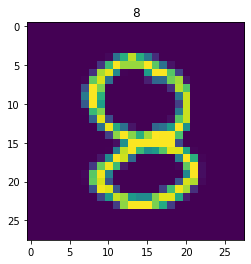

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from time import time

#https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

with np.load('prediction-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

X = torch.from_numpy(data_x)
Y = torch.from_numpy(data_y)

print("X",X.shape)

#Build Testset from Trainingset
# dataX = torch.split(X, [15000,5000])
# dataY = torch.split(Y, [15000,5000])

# TrainingX = dataX[0]
# TestX = dataX[1]
# TrainingY = dataY[0]
# TestY = dataY[1]

#Alternatively, use all data for training:
TrainingX = X
TrainingY = Y

print(TrainingX.shape)
# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)

plt.imshow(data_x[0, 0])
plt.title(data_y[0])
plt.show()

#Build Model
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
criterion = nn.NLLLoss()

In [34]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
     
for e in range(epochs):
    running_loss = 0
    
    BatchesX, BatchesY = GetBatches(TrainingX, TrainingY)
    
    for i in range(len(BatchesX)):
        #Flatten
        x = BatchesX[i]
        x = torch.flatten(x, start_dim = 1)
        y = BatchesY[i]
  
    
        # Training pass
        optimizer.zero_grad()

        output = model(x)
        loss = criterion(output, y)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(BatchesX[0])))
    
    #print('weights 1',torch.nonzero(model[0].weight.grad ))


print("\nTraining Time (in minutes) =",(time()-time0)/60) 


Epoch 0 - Training loss: 0.6230006156823574
Epoch 1 - Training loss: 0.11574252637533042
Epoch 2 - Training loss: 0.0853997681958553
Epoch 3 - Training loss: 0.07114217029168056
Epoch 4 - Training loss: 0.06094344065357477
Epoch 5 - Training loss: 0.054279374913909495
Epoch 6 - Training loss: 0.049076209823863626
Epoch 7 - Training loss: 0.044558391643640324
Epoch 8 - Training loss: 0.03906355062738443
Epoch 9 - Training loss: 0.03781605710108311
Epoch 10 - Training loss: 0.034591321857311785
Epoch 11 - Training loss: 0.032327600014515415
Epoch 12 - Training loss: 0.029554809813793652
Epoch 13 - Training loss: 0.028186735780670855
Epoch 14 - Training loss: 0.027573803660626978

Training Time (in minutes) = 0.08205451170603434


In [35]:
# Test Model


correct_count, all_count = 0, 0

for i in range(TestX.shape[0]):
    image = torch.flatten(TestX[i], start_dim = 1)


    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(image)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = TestY[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 5000

Model Accuracy = 0.9684


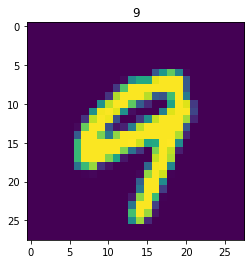

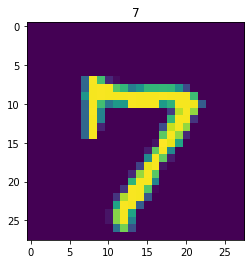

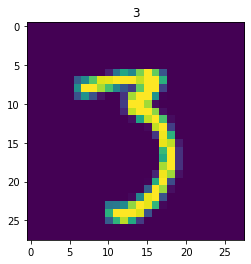

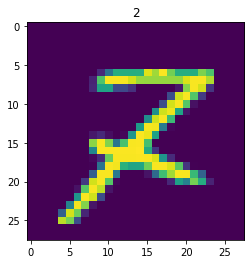

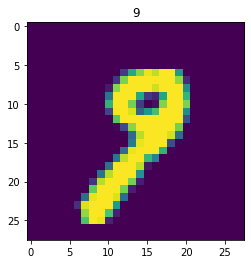

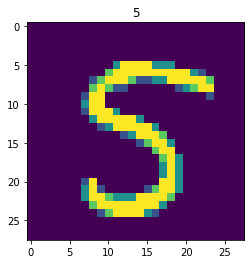

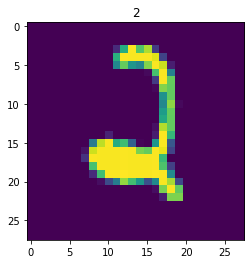

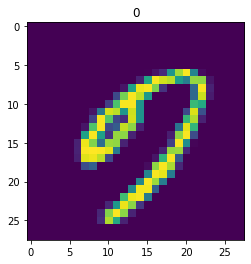

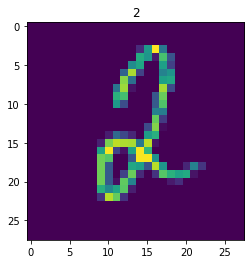

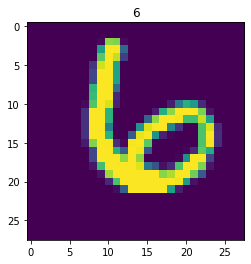

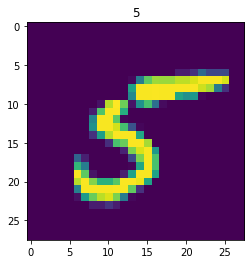

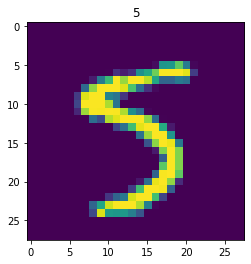

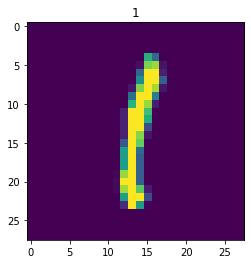

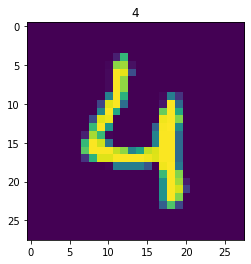

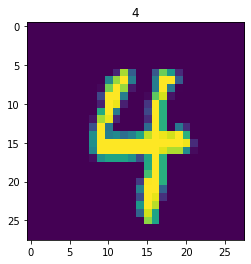

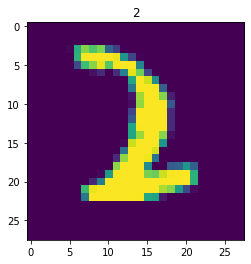

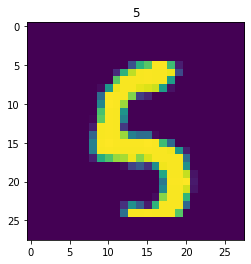

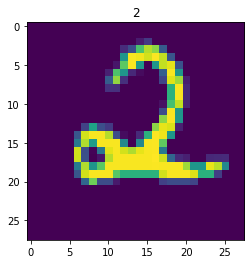

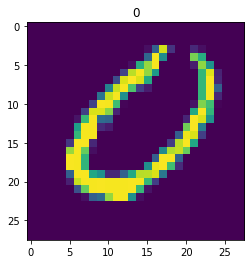

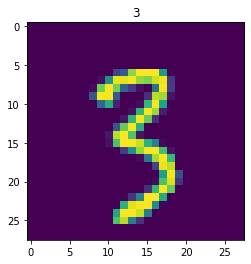

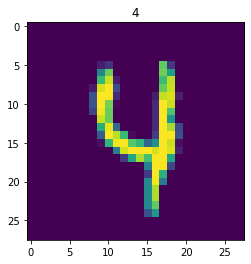

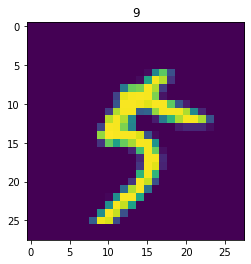

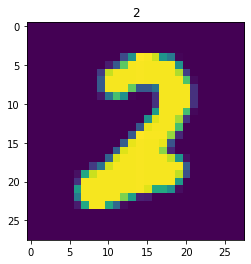

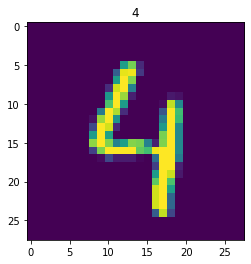

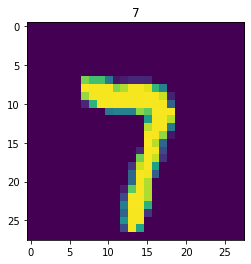

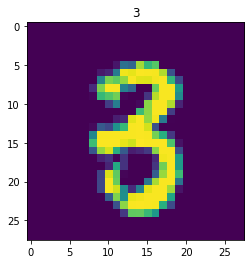

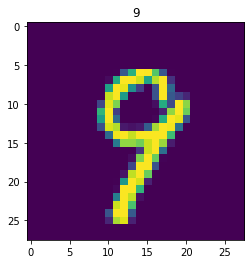

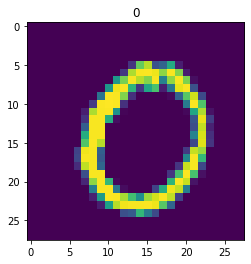

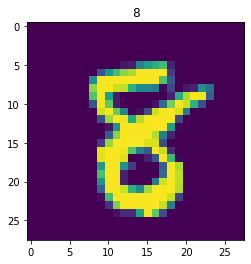

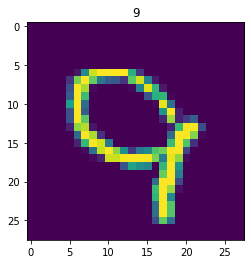

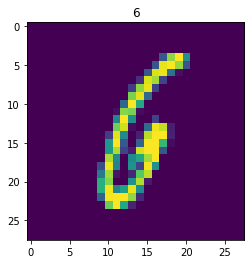

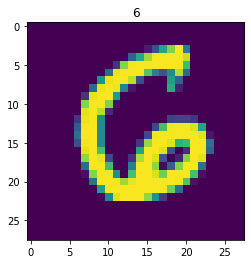

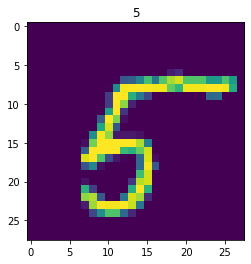

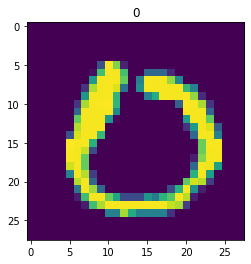

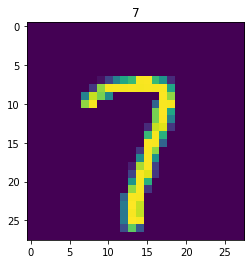

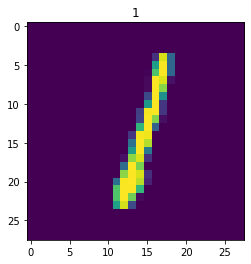

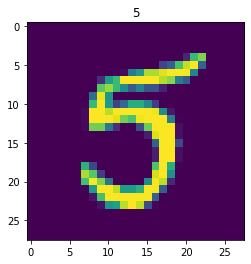

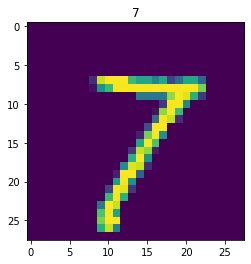

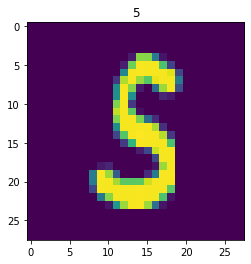

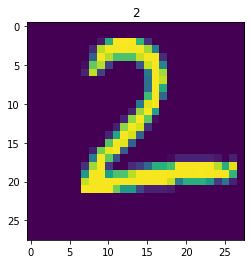

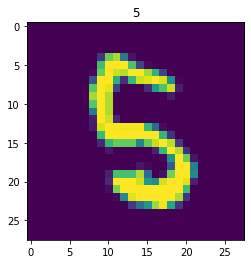

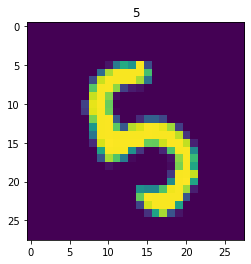

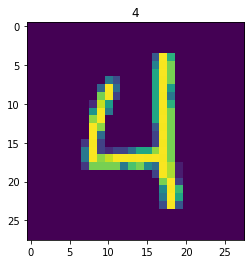

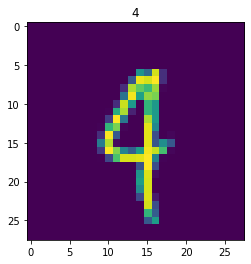

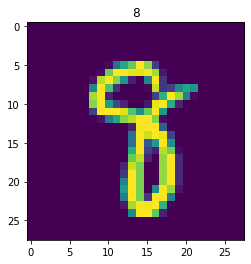

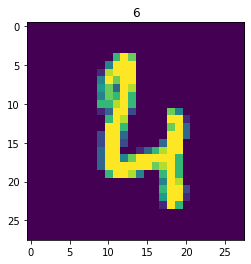

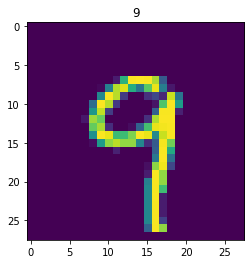

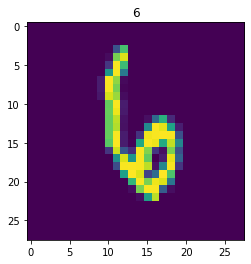

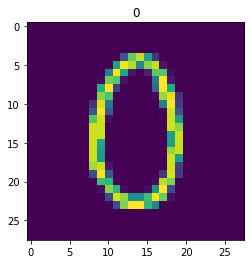

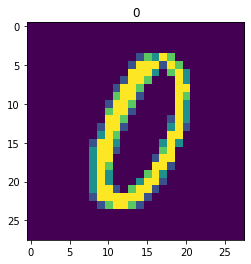

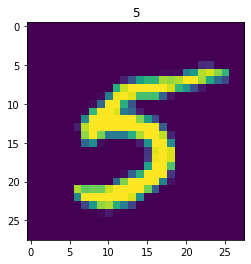

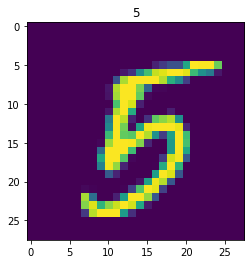

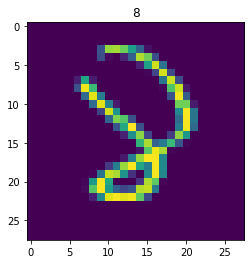

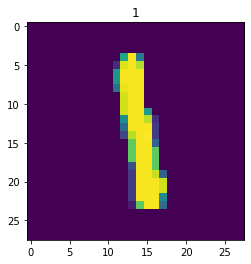

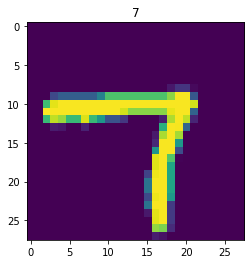

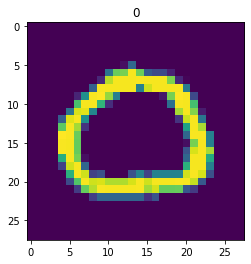

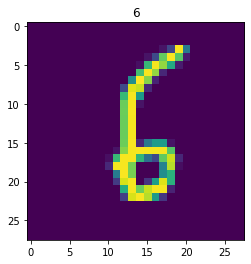

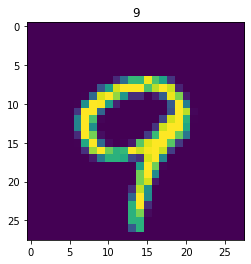

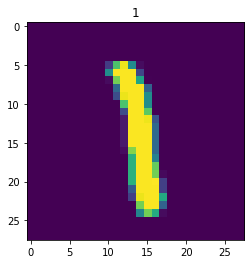

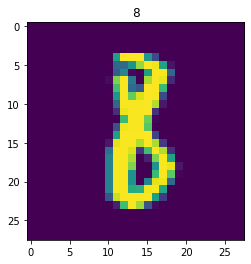

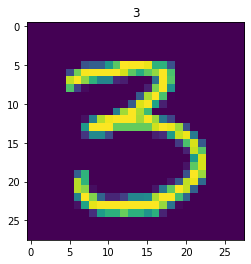

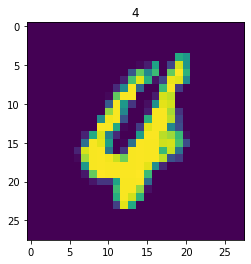

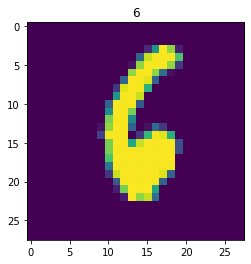

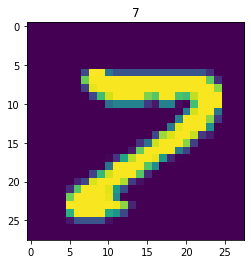

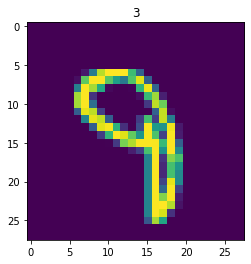

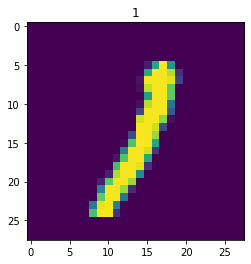

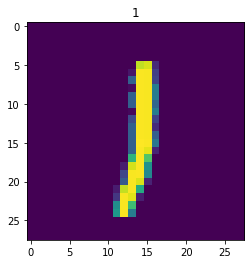

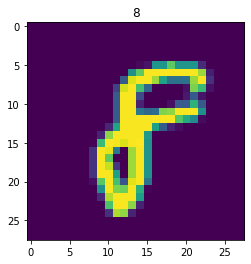

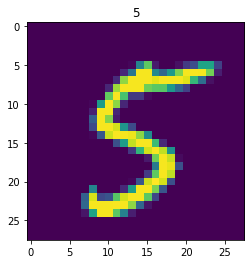

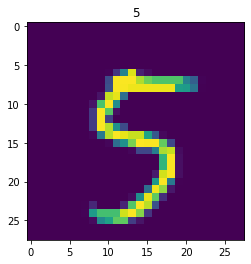

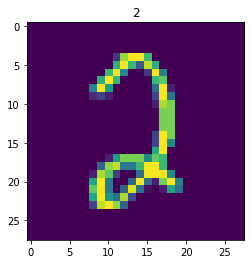

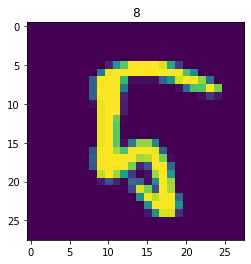

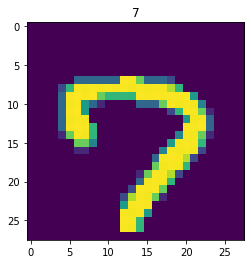

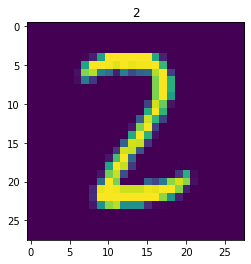

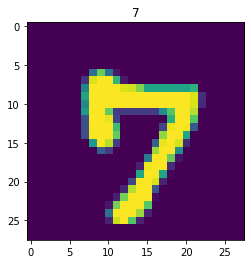

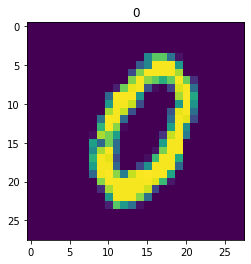

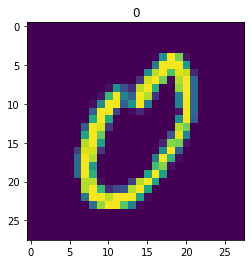

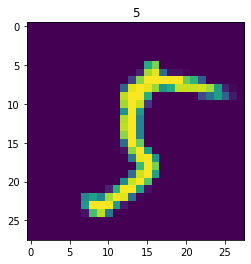

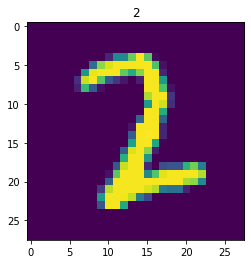

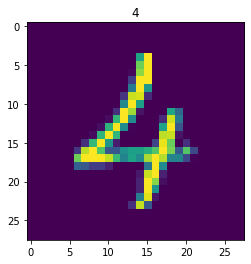

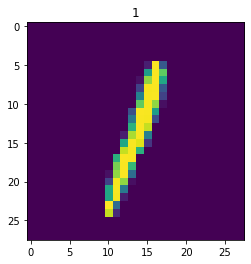

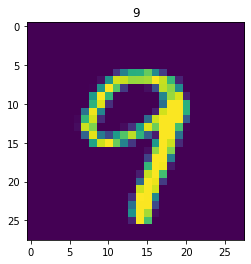

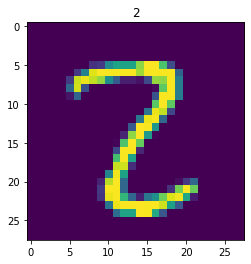

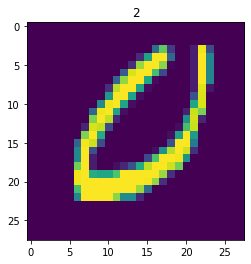

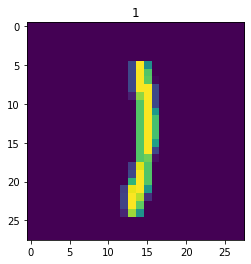

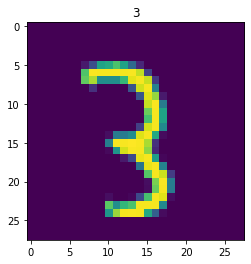

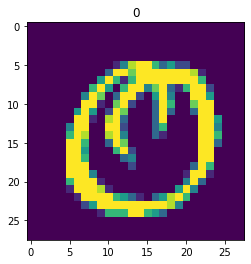

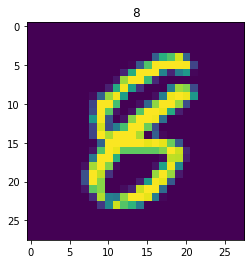

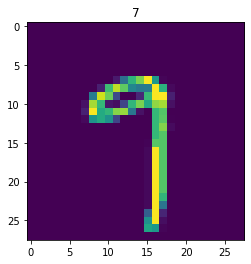

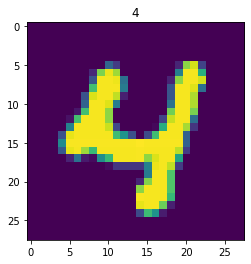

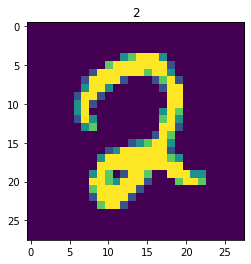

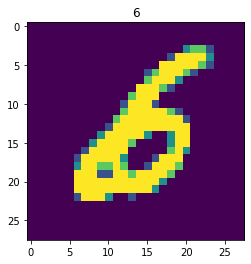

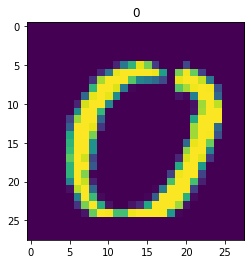

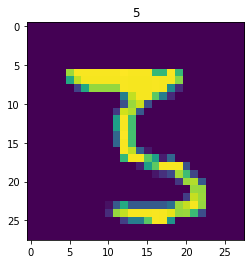

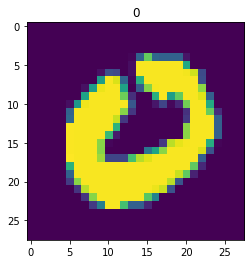

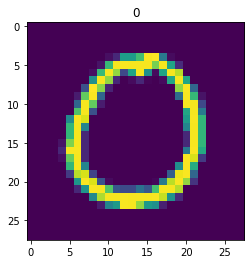

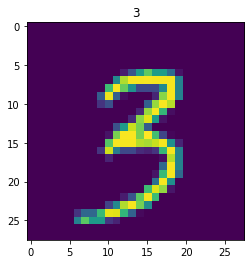

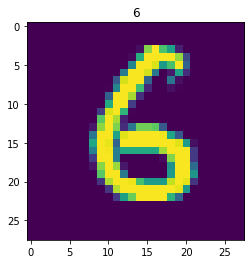

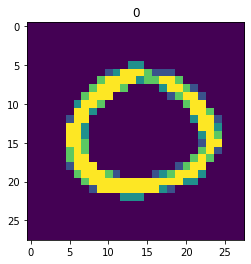

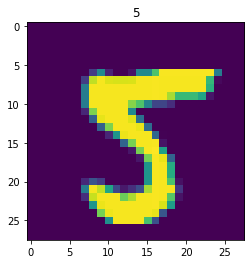

In [36]:
#Visualize test data and prediction
for x in test_x[:20]:
    x = torch.from_numpy(x)
    image = torch.flatten(x, start_dim = 1)

    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(image)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    #true_label = TestY[i]
    plt.imshow(x.reshape(28,28))
    plt.title(pred_label)
    plt.show()